In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_feedback_satisfaction.csv")
df

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.00
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.00
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.00
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.00
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.00
...,...,...,...,...,...,...,...,...,...,...,...
38439,38440,55,Female,USA,80880,6,3,14,High,Silver,75.85
38440,38441,44,Male,Canada,42845,5,10,1,Low,Silver,100.00
38441,38442,43,Female,USA,71433,7,9,7,Medium,Bronze,100.00
38442,38443,28,Female,USA,105587,7,5,16,High,Silver,100.00


In [3]:
df = df.drop("CustomerID", axis=1)
df

,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,56,Male,UK,83094,5,8,5,Low,Bronze,100.00
1,69,Male,UK,86860,10,2,8,Medium,Gold,100.00
2,46,Female,USA,60173,8,10,18,Medium,Silver,100.00
3,32,Female,UK,73884,7,10,16,Low,Gold,100.00
4,60,Male,UK,97546,6,4,13,Low,Bronze,82.00
...,...,...,...,...,...,...,...,...,...,...
38439,55,Female,USA,80880,6,3,14,High,Silver,75.85
38440,44,Male,Canada,42845,5,10,1,Low,Silver,100.00
38441,43,Female,USA,71433,7,9,7,Medium,Bronze,100.00
38442,28,Female,USA,105587,7,5,16,High,Silver,100.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                38444 non-null  int64  
 1   Gender             38444 non-null  object 
 2   Country            38444 non-null  object 
 3   Income             38444 non-null  int64  
 4   ProductQuality     38444 non-null  int64  
 5   ServiceQuality     38444 non-null  int64  
 6   PurchaseFrequency  38444 non-null  int64  
 7   FeedbackScore      38444 non-null  object 
 8   LoyaltyLevel       38444 non-null  object 
 9   SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(5), object(4)
memory usage: 2.9+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,38444.0,43.496853,14.972748,18.00,31.00,43.00,56.00,69.0
Income,38444.0,75076.619238,25975.752966,30001.00,52624.50,75236.00,97606.75,119999.0
ProductQuality,38444.0,5.494746,2.873192,1.00,3.00,5.00,8.00,10.0
ServiceQuality,38444.0,5.492769,2.875812,1.00,3.00,5.00,8.00,10.0
PurchaseFrequency,38444.0,10.453881,5.765621,1.00,5.00,10.00,15.00,20.0
SatisfactionScore,38444.0,85.276409,16.898577,4.28,74.47,91.27,100.00,100.0


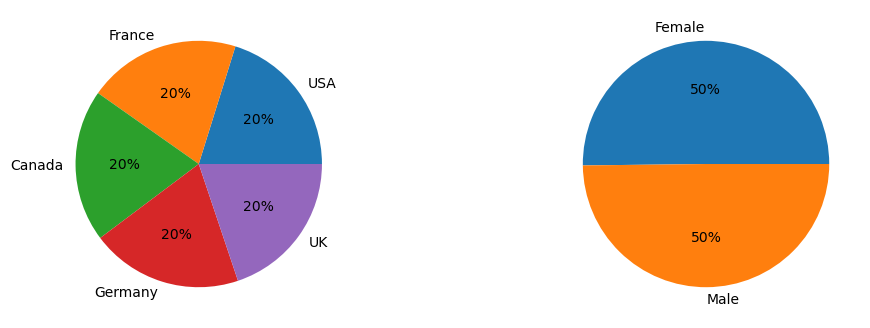

In [6]:
fig, ax = plt.subplots(1,2)
ax[0].pie(df["Country"].value_counts(), labels=df["Country"].value_counts().index, autopct='%.0f%%');
ax[1].pie(df["Gender"].value_counts(), labels=df["Gender"].value_counts().index, autopct='%.0f%%');
fig.set_figheight(4)
fig.set_figwidth(12)

<Axes: xlabel='SatisfactionScore', ylabel='Count'>

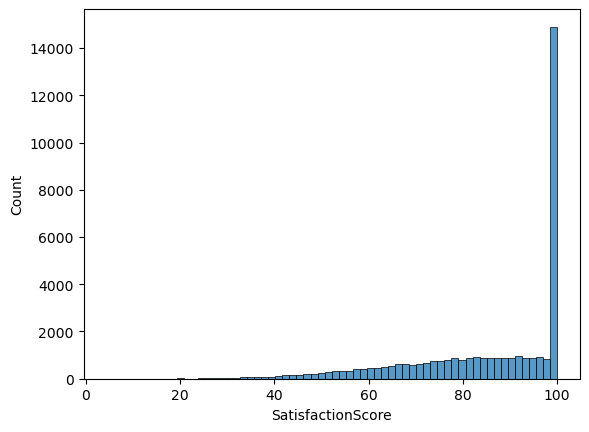

In [7]:
sns.histplot(data=df, x="SatisfactionScore")

<Axes: ylabel='Income'>

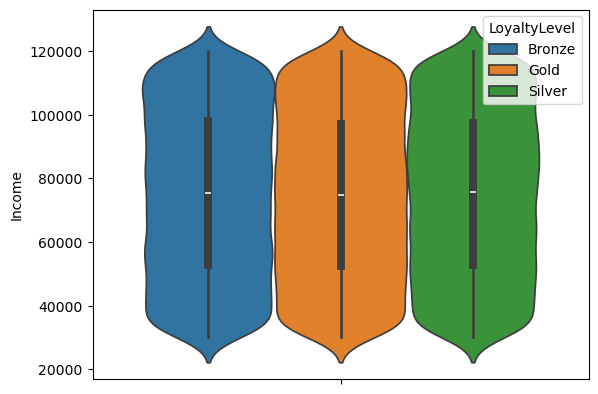

In [8]:
sns.violinplot(data=df, y="Income", hue="LoyaltyLevel")

<Axes: ylabel='SatisfactionScore'>

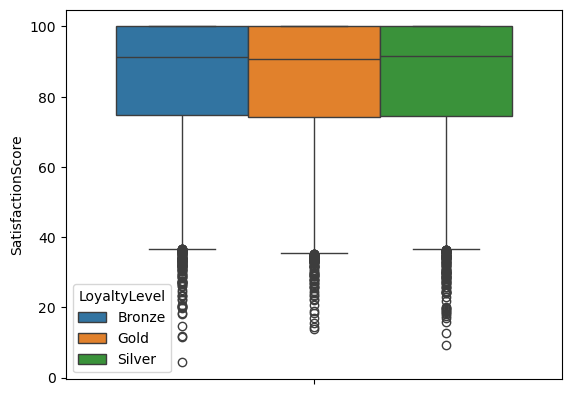

In [9]:
sns.boxplot(data=df, y="SatisfactionScore", hue="LoyaltyLevel")

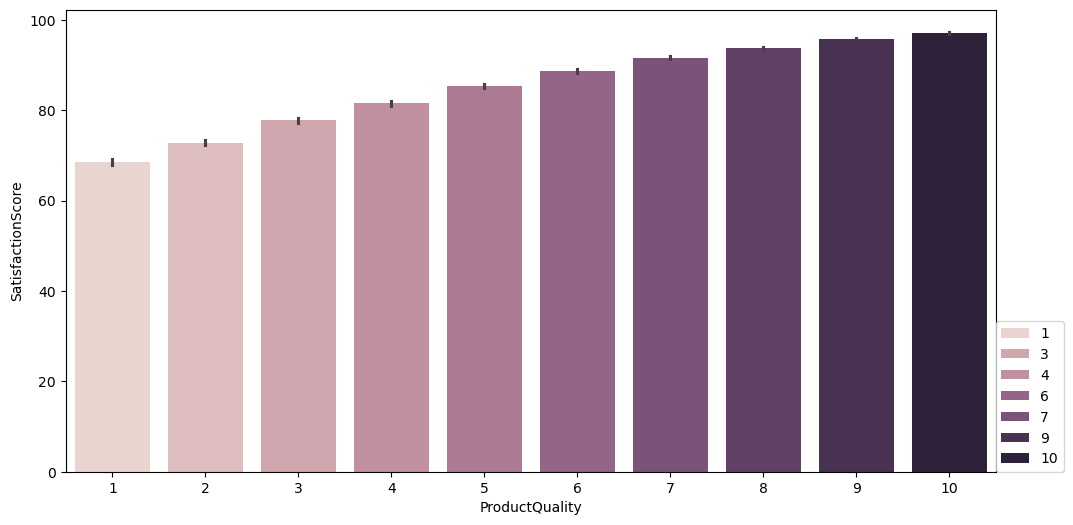

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="ProductQuality", y="SatisfactionScore", hue="ProductQuality")
plt.legend(loc=(1,0))

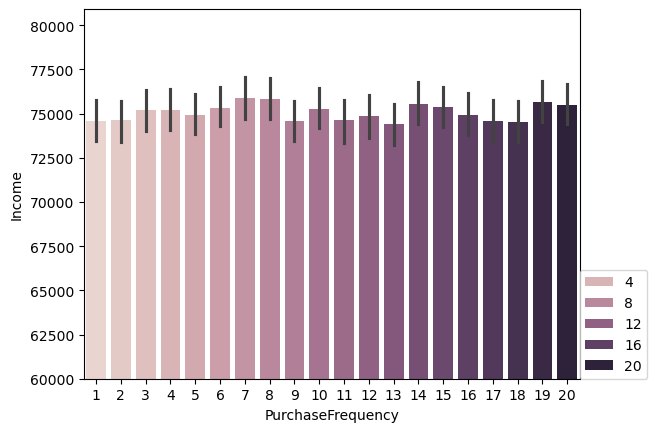

In [11]:
sns.barplot(data=df, x="PurchaseFrequency", y="Income", hue="PurchaseFrequency")
plt.ylim(60000)
plt.legend(loc=(1,0))

<Axes: xlabel='Age', ylabel='Count'>

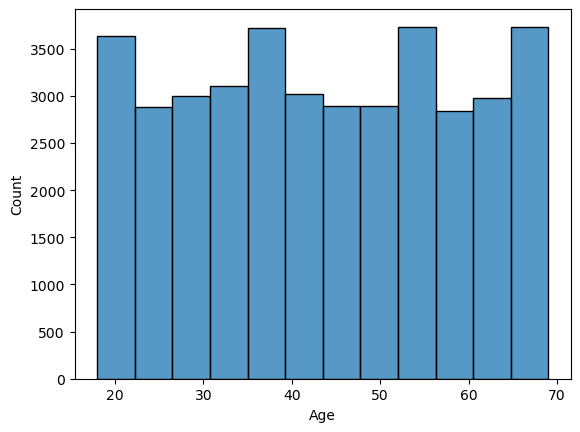

In [12]:
sns.histplot(data=df, x="Age", bins=12)

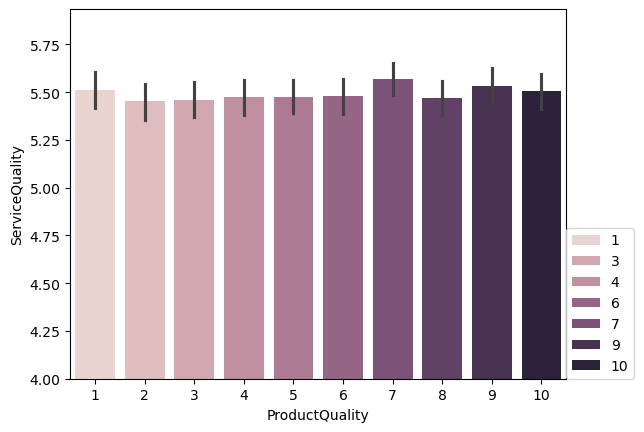

In [13]:
sns.barplot(data=df, x="ProductQuality", y="ServiceQuality", hue="ProductQuality")
plt.ylim(4)
plt.legend(loc=(1,0))

In [15]:
df_dummies = pd.get_dummies(data=df, dtype=int, drop_first=True)

<Axes: >

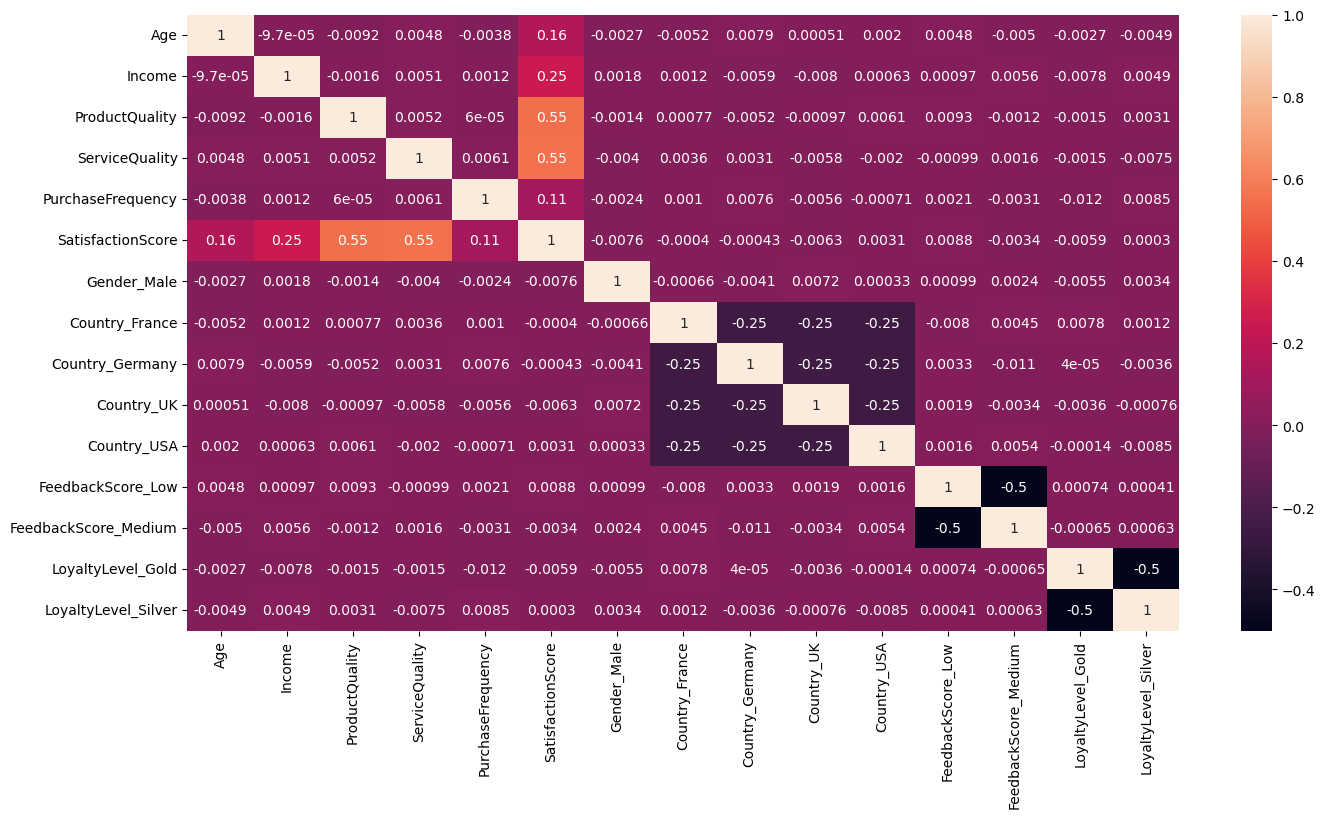

In [43]:
plt.figure(figsize=(16,8))
sns.heatmap(df_dummies.corr(), annot=True)

In [17]:
X = df_dummies.drop("SatisfactionScore", axis=1)
y = df_dummies["SatisfactionScore"]

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
scaler = StandardScaler()

In [25]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [47]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

In [49]:
models = {
        'Linear Regression': Pipeline([
        ('scaler', StandardScaler()),  
        ('estimator', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('estimator', RandomForestRegressor())
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('estimator', GradientBoostingRegressor())
    ]),
    'K Neighbors': Pipeline([
        ('scaler', StandardScaler()),
        ('estimator', KNeighborsRegressor())
    ]),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('estimator', SVR())
    ])
}

In [51]:
from sklearn.model_selection import GridSearchCV

In [59]:
param_grids = {
    "Random Forest": {
        "estimator__n_estimators" : [10,100,1000]
    },
    "Gradient Boosting": {
        "estimator__n_estimators" : [10,100,1000],
        "estimator__learning_rate" : [0.01, 0.1, 0.5]
    },
    "K Neighbors" : {
        "estimator__n_neighbors" : [3,5,7,10],
        "estimator__weights" : ["uniform", "distance"]
    },
    "SVR": {
        "estimator__gamma" : ["scale", "auto"],
        "estimator__C" : [0.1,1,10]
    }
}

In [61]:
best_models = {}
for model_name, model_pipeline in models.items():
    if model_name in param_grids:
        grid = GridSearchCV(model_pipeline, param_grids[model_name],
                            cv=5, scoring="neg_mean_squared_error")
        grid.fit(scaled_X_train, y_train)
        best_models[model_name] = grid.best_estimator_
    else:
        model_pipeline.fit(scaled_X_train, y_train)
        best_models[model_name] = model_pipeline

In [63]:
best_models

{'Linear Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('estimator', LinearRegression())]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('estimator', RandomForestRegressor(n_estimators=1000))]),
 'Gradient Boosting': Pipeline(steps=[('scaler', StandardScaler()),
                 ('estimator', GradientBoostingRegressor())]),
 'K Neighbors': Pipeline(steps=[('scaler', StandardScaler()),
                 ('estimator',
                  KNeighborsRegressor(n_neighbors=10, weights='distance'))]),
 'SVR': Pipeline(steps=[('scaler', StandardScaler()),
                 ('estimator', SVR(C=10, gamma='auto'))])}

In [65]:
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
scorings = {}

for model_name, model in best_models.items():
    preds = model.predict(scaled_X_test)

    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    scorings[model_name] = {"Mean Squared Error" : mse, "R2 Score" : r2}

In [71]:
scorings

{'Linear Regression': {'Mean Squared Error': 84.56195047734674,
  'R2 Score': 0.6984234716258496},
 'Random Forest': {'Mean Squared Error': 64.31736880017495,
  'R2 Score': 0.7706224999846378},
 'Gradient Boosting': {'Mean Squared Error': 60.007898121871925,
  'R2 Score': 0.7859915306060516},
 'K Neighbors': {'Mean Squared Error': 80.70145512853331,
  'R2 Score': 0.7121913043038766},
 'SVR': {'Mean Squared Error': 59.64872262015195,
  'R2 Score': 0.7872724719783154}}

In [99]:
scorings_df = pd.DataFrame(scorings).transpose()
scorings_df

,Mean Squared Error,R2 Score
Linear Regression,84.561950,0.698423
Random Forest,64.317369,0.770622
Gradient Boosting,60.007898,0.785992
K Neighbors,80.701455,0.712191
SVR,59.648723,0.787272


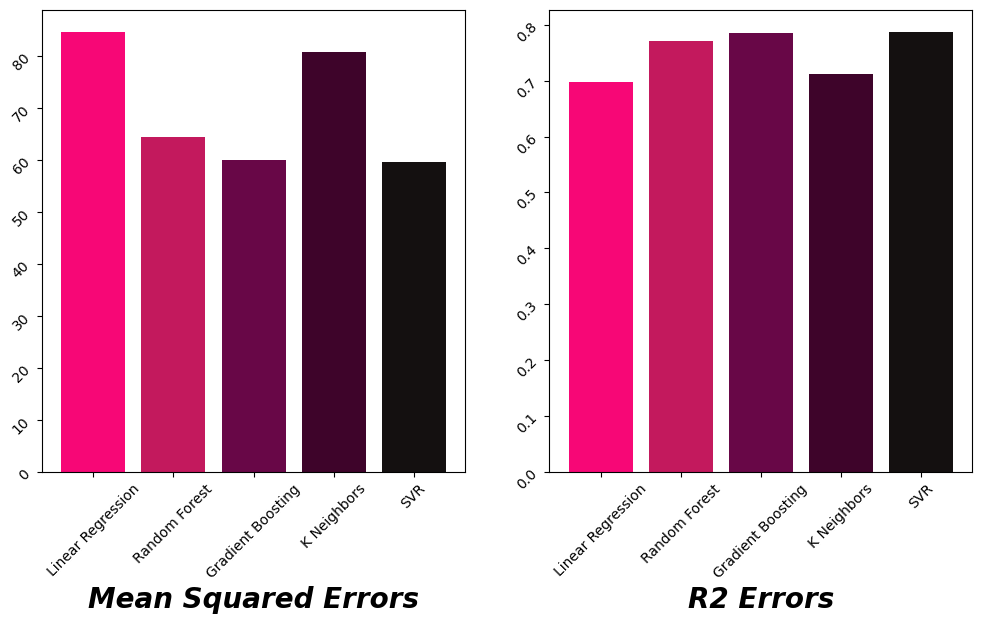

In [201]:
fig, ax = plt.subplots(1,2)

ax[0].bar(scorings_df["Mean Squared Error"].index,
          scorings_df["Mean Squared Error"],
          color=["#f70776", "#c3195d", "#680747", "#3e042a", "#141010"])
ax[1].bar(scorings_df["R2 Score"].index,
          scorings_df["R2 Score"],
          color=["#f70776", "#c3195d", "#680747", "#3e042a", "#141010"])

ax[0].tick_params(labelrotation=45)
ax[1].tick_params(labelrotation=45)

ax[0].set_xlabel("Mean Squared Errors", size=20, fontstyle="oblique", weight="bold")
ax[1].set_xlabel("R2 Errors", size=20, fontstyle="oblique", weight="bold")

fig.set_figheight(6)
fig.set_figwidth(12)


In [203]:
final_model = SVR(C=10, gamma="auto")

In [207]:
final_model.fit(scaled_X_train, y_train)

SVR(C=10, gamma='auto')

In [211]:
final_predictions = final_model.predict(scaled_X_test)

In [281]:
preds_tests = pd.DataFrame(np.vstack((final_predictions, np.array(y_test))).transpose())

Text(0, 0.5, 'Test Values')

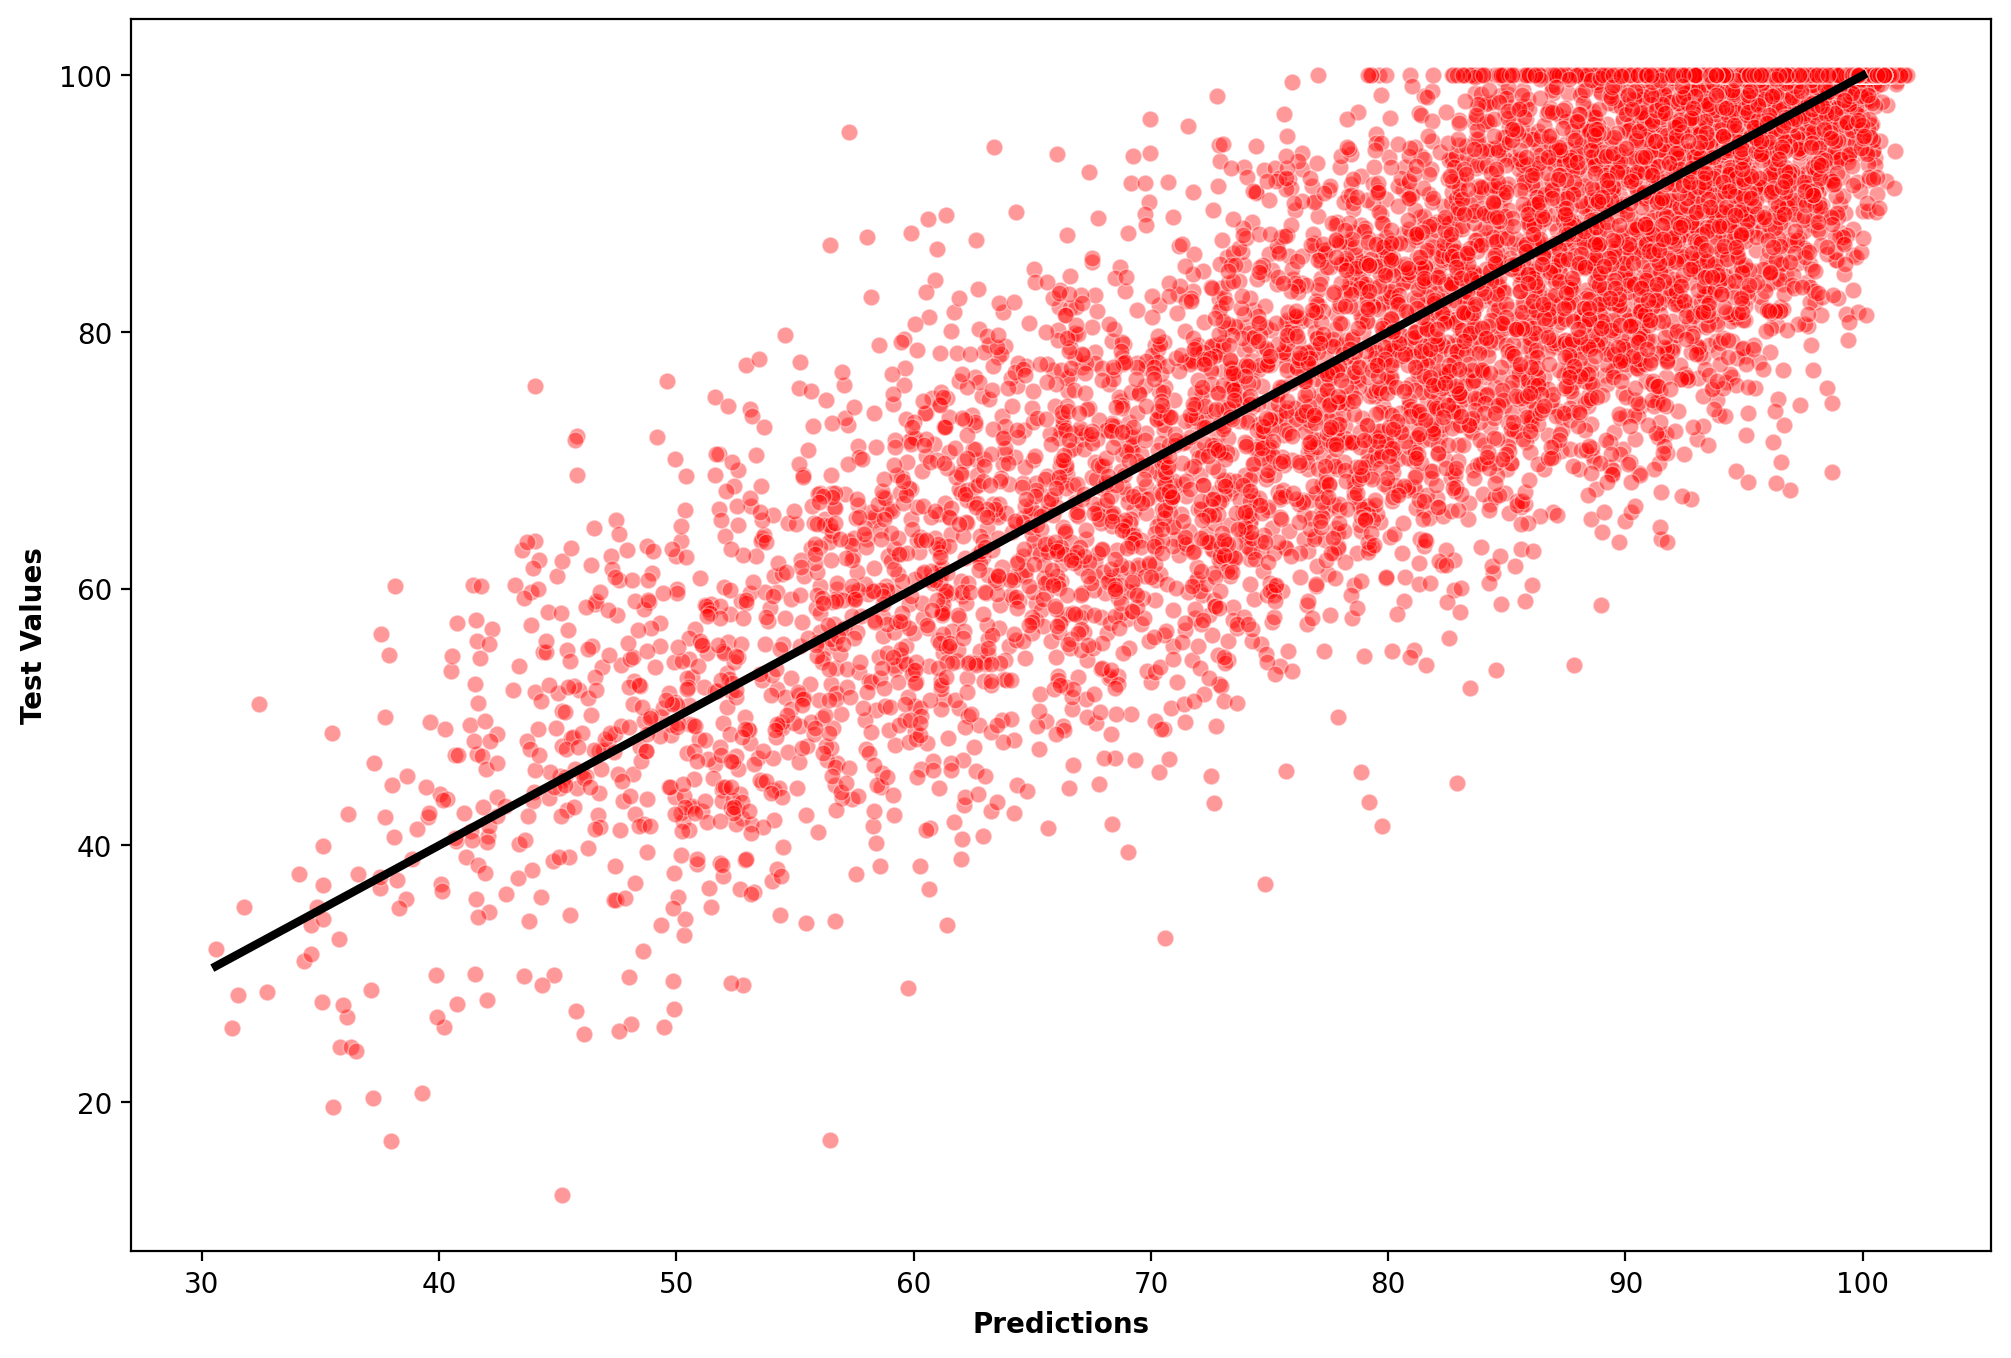

In [319]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(data=preds_tests, x=0, y=1, alpha=0.4, c="r")
identity_line = np.linspace(max(min(preds_tests[0]), min(preds_tests[1])),
                            min(max(preds_tests[0]), max(preds_tests[1])))
plt.plot(identity_line, identity_line, color="black", linewidth=3.0)

plt.xlabel("Predictions", weight="bold")
plt.ylabel("Test Values", weight="bold")

In [331]:
r2_score(y_test, final_predictions), np.sqrt(mean_squared_error(y_test, final_predictions))

(0.7872724719783155, 7.723258549352853)